In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout,Activation, BatchNormalization, regularizers

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pwd

/content/drive/My Drive/Urvi


In [0]:
import os
os.chdir("drive/My Drive/Urvi")

In [23]:
classifier = Sequential()

#first conv layer
classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3),activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size = (2,2)))

#second conv layer
classifier.add(Convolution2D(64,3,3, input_shape = (64,64,3),activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [24]:
classifier.add(Flatten())
classifier.add(Dense(output_dim = 256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim = 3, activation = 'softmax'))
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3)`
  """


In [25]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
training_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64,64),
    batch_size=20,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64,64),
    batch_size=20,
    class_mode='categorical')

Found 300 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [30]:
from IPython.display import display
from PIL import Image
history = classifier.fit_generator(
    training_set,
    steps_per_epoch = 15,
    epochs = 25,
    validation_data = test_set,
    validation_steps = 3)

Epoch 1/25
15/15 [==============================] - 2s 155ms/step - loss: 1.1750 - acc: 0.4400 - val_loss: 1.0163 - val_acc: 0.5667
Epoch 2/25
15/15 [==============================] - 1s 94ms/step - loss: 0.7546 - acc: 0.7033 - val_loss: 0.6091 - val_acc: 0.7500
Epoch 3/25
15/15 [==============================] - 2s 103ms/step - loss: 0.5158 - acc: 0.7633 - val_loss: 0.4801 - val_acc: 0.8000
Epoch 4/25
15/15 [==============================] - 2s 101ms/step - loss: 0.5628 - acc: 0.7500 - val_loss: 0.5266 - val_acc: 0.9167
Epoch 5/25
15/15 [==============================] - 2s 102ms/step - loss: 0.5184 - acc: 0.7800 - val_loss: 0.4931 - val_acc: 0.8833
Epoch 6/25
15/15 [==============================] - 2s 101ms/step - loss: 0.4248 - acc: 0.8033 - val_loss: 0.3737 - val_acc: 0.9000
Epoch 7/25
15/15 [==============================] - 2s 103ms/step - loss: 0.3611 - acc: 0.8267 - val_loss: 0.3573 - val_acc: 0.9333
Epoch 8/25
15/15 [==============================] - 2s 101ms/step - loss: 0.3

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Text(0.5, 1.0, 'Training and validation loss')

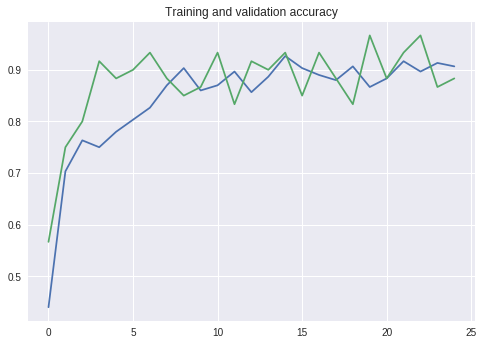

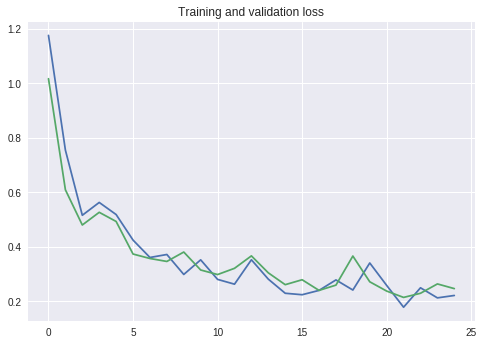

In [32]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [51]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('disease_late_blight_1.jpg',target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result [0][0] == 1:
    prediction = 'Potato___Early_blight'
elif result [0][1] == 1:
    prediction = 'Potato___Late_blight'
else:
    prediction = 'Potato___healthy'
print(prediction)

Potato___Late_blight


In [50]:
!ls

cnncode_potato.ipynb	    disease_late_blight_1.jpg  healthy_potato_2.jpg
dataset			    disease_late_blight_2.jpg
disease_early_blight_1.jpg  healthy_potato_1.jpg


weights of the above model saved

In [6]:
fname = "potato_CNN.hdf5"
classifier.save_weights(fname,overwrite=True)

NameError: ignored

This is to load the weights trained above

In [0]:
fname = "potato_CNN.hdf5"
classifier.load_weights(fname)

ValueError: ignored